# Importing the basic dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Making an activation Function

In [ ]:
def step(x):
    return np.where(x >= 0, 1, 0)

# Making the perceptron itself

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.lr = learning_rate

    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1)  # add bias term at index 0
        z = np.dot(self.weights, x_with_bias)
        return step(z)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            total_error = 0
            for xi, target in zip(X, y):
                xi_with_bias = np.insert(xi, 0, 1)
                output = step(np.dot(self.weights, xi_with_bias))
                error = target - output
                self.weights += self.lr * error * xi_with_bias
                total_error += int(error != 0)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Errors = {total_error}")

# Generate a simple dataset (AND logic gate)

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Training the perceptron

In [ ]:
model = Perceptron(input_size=2, learning_rate=0.1)
model.train(X, y, epochs=100)

Epoch 0: Errors = 2
Epoch 10: Errors = 0
Epoch 20: Errors = 0
Epoch 30: Errors = 0
Epoch 40: Errors = 0
Epoch 50: Errors = 0
Epoch 60: Errors = 0
Epoch 70: Errors = 0
Epoch 80: Errors = 0
Epoch 90: Errors = 0


In [ ]:
x1 = np.linspace(-0.2, 1.2, 10)
x2 = -(model.weights[1] * x1 + model.weights[0]) / model.weights[2]

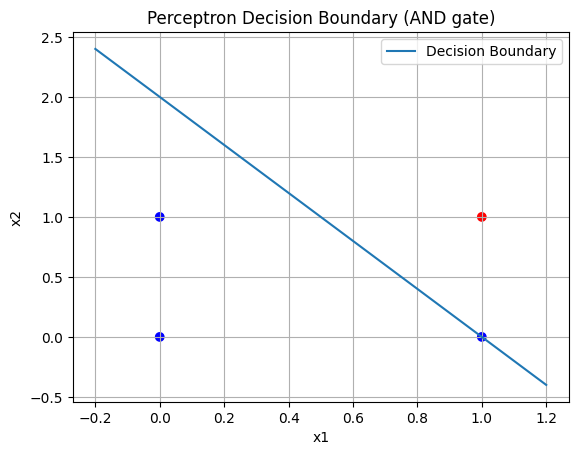

In [ ]:
plt.plot(x1, x2, label="Decision Boundary")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Perceptron Decision Boundary (AND gate)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()